# Continuing to Administer Portal and Server

### Deep Dive into PortalAdmin API

####  Inspecting the Portal's Machines

- query the machines that power your portal



In [1]:
from arcgis.gis import GIS
gis = GIS(profile='your_enterprise_profile')

In [2]:
machines = gis.admin.machines
machines

< Machines @ https://pythonapi.playground.esri.com/portal/portaladmin/machines >

In [3]:
machines.list()

[< Machine @ https://pythonapi.playground.esri.com/portal/portaladmin/machines >]

**Check if Machine is Running**


In [5]:
machine = machines.list()[0]
machine.properties

{
  "machineName": "IP-172-31-37-58.US-EAST-2.COMPUTE.INTERNAL",
  "adminURL": "https://ip-172-31-37-58.us-east-2.compute.internal:7443/arcgis",
  "role": "",
  "platform": "Linux-amd64-5.19.0-1025-aws"
}

**Check if Machine is Running**

In [6]:
machine = machines.list()[0]
machine.status()

True

#### System Directories

- inspect the physical pathes where resources are stored

In [20]:
directories = gis.admin.system.directories
directories

[< Directory @ https://rextapilnx02eb.esri.com/portal/portaladmin/system/directories/content >,
 < Directory @ https://rextapilnx02eb.esri.com/portal/portaladmin/system/directories/index >,
 < Directory @ https://rextapilnx02eb.esri.com/portal/portaladmin/system/directories/db >,
 < Directory @ https://rextapilnx02eb.esri.com/portal/portaladmin/system/directories/temp >]

In [21]:
d = directories[0]
d.properties

{
  "name": "content",
  "physicalPath": "{\"type\":\"fileStore\",\"provider\":\"FileSystem\",\"connectionString\":\"/data/arcgis/usr/arcgisportal/content\"}",
  "directoryType": "CONTENT",
  "description": "The content directory."
}

#### The System 

In [22]:
system = gis.admin.system
system

< System @ https://rextapilnx02eb.esri.com/portal/portaladmin/system >

In [23]:
system.properties

{}

#### Re-indexing

- Sometimes artifacts remain after deleting items
- Forcing re-indexing can solved that problem

In [16]:
system.index_status

{'indexes': [{'name': 'users', 'databaseCount': 77, 'indexCount': 77},
  {'name': 'groups', 'databaseCount': 456, 'indexCount': 456},
  {'name': 'search', 'databaseCount': 15830, 'indexCount': 15830}],
 'syncStatus': True}

In [17]:
system.reindex(mode="SEARCH_MODE")

True

In [19]:
system.index_status

{'status': 'A reindex operation is in progress.  Portal content and search operations will be unavailable until the reindex is complete.  You can monitor the status by refreshing the page.'}

## Managing ArcGIS Server

### Managing Federated Servers

- The `admin` property provides useful tools to manage ArcGIS Server instances

In [7]:
gis = GIS(verify_cert=False, profile='your_enterprise_profile')
servers = gis.admin.servers
servers

Setting `verify_cert` to False is a security risk, use at your own risk.


< ServerManager @ https://pythonapi.playground.esri.com/portal/portaladmin >

#### Listing the Federated Servers


In [8]:
s = servers.list()
s

[< Server @ https://pythonapi.playground.esri.com/server/admin >,
 < Server @ https://pythonapi.playground.esri.com/ga/admin >,
 < Server @ https://pythonapi.playground.esri.com/ra/admin >,
 < NotebookServer @ https://pythonapi.playground.esri.com/dsx/admin >]

#### Lists Server Certificates

In [9]:
machine = s[1].machines.list()[0]

In [10]:
machine.ssl_certificates

{'certificates': ['selfsignedcertificate']}

#### Check if Servers are Working

- validate ensures everything is federated and running correctly

In [11]:
servers.validate()

True

### Connecting to a Server

#### Accessing Single Server


In [14]:
server = s[0]
server

< Server @ https://pythonapi.playground.esri.com/server/admin >

In [15]:
server.properties

{
  "isServerLicensed": "true",
  "resources": [
    "machines",
    "clusters",
    "system",
    "services",
    "security",
    "data",
    "uploads",
    "logs",
    "mode",
    "usagereports",
    "webhooks"
  ],
  "currentVersion": 11.1,
  "fullVersion": "11.1.0",
  "acceptLanguage": null
}

#### Accessing Server Logs

- Like the portal Logs, server provide a host of information

In [17]:
logs = server.logs
logs

<LogManager at https://pythonapi.playground.esri.com/server/admin/logs>

In [18]:
logs.settings

{'logDir': '/data/arcgis/server/usr/logs/',
 'logLevel': 'WARNING',
 'maxErrorReportsCount': 10,
 'maxLogFileAge': 90,
 'usageMeteringEnabled': False,
 'statisticsConfig': {'enabled': True,
  'samplingInterval': 30,
  'maxHistory': 0,
  'statisticsDir': '/data/arcgis/arcgisserver/directories/arcgissystem'}}

**Demo: Querying Logs**

In [19]:
import pandas as pd
import datetime as _dt
msgs = logs.query(
    start_time=_dt.datetime.now() - _dt.timedelta(days=10))['logMessages']
pd.DataFrame(msgs).head()

,type,message,time,source,machine,user,code,elapsed,process,thread,methodName,requestID
0,SEVERE,Error executing tool. Export Web Map Task : Fa...,1739475158626,Utilities/PrintingTools.GPServer,IP-172-31-44-255.US-EAST-2.COMPUTE.INTERNAL,nparavicini,20010,,3762266,5336,GPServerSync.CheckMessages,cc3659d1-a3c5-4787-b238-d358b9e82dbb
1,SEVERE,"ERROR: Unable to refresh item, Generic Server ...",1739252326075,System/PublishingTools.GPServer,IP-172-31-44-255.US-EAST-2.COMPUTE.INTERNAL,nparavicini,23836,,2572927,408,SDMapServicePublisher::UpdatePortalServiceItem...,6dfdec54-e840-4f15-899e-cf36cb663cfc
2,WARNING,RefreshPortalItem failed. Service's item exten...,1739252326069,System/PublishingTools.GPServer,IP-172-31-44-255.US-EAST-2.COMPUTE.INTERNAL,nparavicini,23837,,2572927,408,SDMapServicePublisher::UpdatePortalServiceItem...,6dfdec54-e840-4f15-899e-cf36cb663cfc
3,SEVERE,Error executing tool. Export Web Map Task : Fa...,1738846154429,Utilities/PrintingTools.GPServer,IP-172-31-44-255.US-EAST-2.COMPUTE.INTERNAL,naubry,20010,,3762266,5336,GPServerSync.CheckMessages,2c72e783-6d23-4647-9462-6133f9678d06
4,SEVERE,Error executing tool. Export Web Map Task : Fa...,1738846153566,Utilities/PrintingTools.GPServer,IP-172-31-44-255.US-EAST-2.COMPUTE.INTERNAL,naubry,20010,,3762266,5336,GPServerSync.CheckMessages,274487b9-760b-43dd-901f-95dc1e4ef562


### Managing service folders

**Creating a Folder** 

- use `create_folder`

In [22]:
server.services.create_folder("devsummit25")

True

**Delete a Folder** 

- use `delete_folder`

In [23]:
server.services.delete_folder('devsummit25')

True

### Managing Services

- Access service management from `services` property
- Provides the ability start,stop, delete, and modify services

In [24]:
services = server.services
services

< ServiceManager @ https://pythonapi.playground.esri.com/server/admin/services >

#### Checking if Service Exists

To check if a service exists on your server, call the `exists` method and specify the folder name, service name and type. You can also use this method to verify if a folder exists on the server.

In [25]:
services.exists(folder_name='Hosted', name='Ports', service_type='FeatureServer')

False

#### Demo: Listing all Services

In [26]:
for folder in services.folders:
    for s in services.list(folder):
        print(s)

<Service at https://pythonapi.playground.esri.com/server/admin/services/customgp/Model.GPServer>
<Service at https://pythonapi.playground.esri.com/server/admin/services/Hosted/1Diffuse80VolumeContinousXYZ.SceneServer>
<Service at https://pythonapi.playground.esri.com/server/admin/services/Hosted/20240508_kdt_service.FeatureServer>
<Service at https://pythonapi.playground.esri.com/server/admin/services/Hosted/a89b39bb6d524298a2a67f61cc8618c7_da89c.FeatureServer>
<Service at https://pythonapi.playground.esri.com/server/admin/services/Hosted/ac0b23c7d49d33e1.VectorTileServer>
<Service at https://pythonapi.playground.esri.com/server/admin/services/Hosted/Active_California_Fires.FeatureServer>
<Service at https://pythonapi.playground.esri.com/server/admin/services/Hosted/adb69d.FeatureServer>
<Service at https://pythonapi.playground.esri.com/server/admin/services/Hosted/All.FeatureServer>
<Service at https://pythonapi.playground.esri.com/server/admin/services/Hosted/all_attr_renamed.Feature

#### Control a Service's State

- `start`, `stop` and `restart` services

In [27]:
for service in services.list():
    if service.properties.serviceName == 'SampleWorldCities':
        break
service

<Service at https://pythonapi.playground.esri.com/server/admin/services/SampleWorldCities.MapServer>

**Check the Service Status**

- Shows if the services is running or not

In [28]:
service.status

{'configuredState': 'STARTED', 'realTimeState': 'STARTED'}

In [29]:
service.stop()

True

In [30]:
service.status

{'configuredState': 'STOPPED', 'realTimeState': 'STOPPED'}

In [31]:
service.start()

True

In [32]:
service.status

{'configuredState': 'STARTED', 'realTimeState': 'STARTED'}

### Modifying a Service

- modify extensions, pooling, etc...

In [33]:
for service in services.list():
    if service.properties.serviceName == 'SampleWorldCities':
        break
service

<Service at https://pythonapi.playground.esri.com/server/admin/services/SampleWorldCities.MapServer>

In [34]:
for ext in service.extensions:
    if ext.typeName == "KmlServer":
        ext.enabled = True
[(ext.typeName, ext.enabled) for ext in service.extensions]

[('NAServer', False),
 ('OGCFeatureServer', True),
 ('WFSServer', True),
 ('WMSServer', True),
 ('NetworkDiagramServer', False),
 ('TopographicProductionServer', False),
 ('TraceNetworkServer', False),
 ('ValidationServer', False),
 ('WCSServer', False),
 ('LRServer', False),
 ('ParcelFabricServer', False),
 ('VersionManagementServer', False),
 ('KmlServer', True),
 ('UtilityNetworkServer', False),
 ('FeatureServer', False)]

### Server Logs

ArcGIS Server records events that occur, and any errors associated with those events, to logs. Logs are an important tool for monitoring and troubleshooting problems with your site. Information in the logs will help you identify errors and provide context on how to address problems

In [37]:
logs = server.logs
logs

<LogManager at https://pythonapi.playground.esri.com/server/admin/logs>

In [38]:
logs.settings

{'logDir': '/data/arcgis/server/usr/logs/',
 'logLevel': 'WARNING',
 'maxErrorReportsCount': 10,
 'maxLogFileAge': 90,
 'usageMeteringEnabled': False,
 'statisticsConfig': {'enabled': True,
  'samplingInterval': 30,
  'maxHistory': 0,
  'statisticsDir': '/data/arcgis/arcgisserver/directories/arcgissystem'}}

#### Filtering and querying server logs

In [39]:
import datetime
import pandas as pd
now = datetime.datetime.now()
start_time = now - datetime.timedelta(days=10)
start_time

datetime.datetime(2025, 2, 24, 13, 39, 24, 360875)

In [40]:
recent_logs = logs.query(start_time = start_time)

#print a message as a sample
pd.DataFrame(recent_logs['logMessages']).head()

,type,message,time,source,machine,user,code,elapsed,process,thread,methodName,requestID
0,SEVERE,Error executing tool. Export Web Map Task : Fa...,1739475158626,Utilities/PrintingTools.GPServer,IP-172-31-44-255.US-EAST-2.COMPUTE.INTERNAL,nparavicini,20010,,3762266,5336,GPServerSync.CheckMessages,cc3659d1-a3c5-4787-b238-d358b9e82dbb
1,SEVERE,"ERROR: Unable to refresh item, Generic Server ...",1739252326075,System/PublishingTools.GPServer,IP-172-31-44-255.US-EAST-2.COMPUTE.INTERNAL,nparavicini,23836,,2572927,408,SDMapServicePublisher::UpdatePortalServiceItem...,6dfdec54-e840-4f15-899e-cf36cb663cfc
2,WARNING,RefreshPortalItem failed. Service's item exten...,1739252326069,System/PublishingTools.GPServer,IP-172-31-44-255.US-EAST-2.COMPUTE.INTERNAL,nparavicini,23837,,2572927,408,SDMapServicePublisher::UpdatePortalServiceItem...,6dfdec54-e840-4f15-899e-cf36cb663cfc
3,SEVERE,Error executing tool. Export Web Map Task : Fa...,1738846154429,Utilities/PrintingTools.GPServer,IP-172-31-44-255.US-EAST-2.COMPUTE.INTERNAL,naubry,20010,,3762266,5336,GPServerSync.CheckMessages,2c72e783-6d23-4647-9462-6133f9678d06
4,SEVERE,Error executing tool. Export Web Map Task : Fa...,1738846153566,Utilities/PrintingTools.GPServer,IP-172-31-44-255.US-EAST-2.COMPUTE.INTERNAL,naubry,20010,,3762266,5336,GPServerSync.CheckMessages,274487b9-760b-43dd-901f-95dc1e4ef562


### Monitoring Server Usage

ArcGIS Server records various service statistics, such as total requests, average response time and timeouts. Administrators and publishers can use this information to monitor service activity to better understand how clients are using services. For example, monitoring server statistics help you answer questions such as:

- What is the total number of requests that my ArcGIS Server site handled during the past week?
- How was the service request load distributed during the past month?
- How are my services performing on an hourly basis?
- What was the maximum number of service instances used at any given time for a particular service?

In [35]:
usage = server.usage
usage

<ReportManager at https://pythonapi.playground.esri.com/server/admin/usagereports>

#### Using built-in report

In [36]:
reports = usage.list()
reports

[< Report @ https://pythonapi.playground.esri.com/server/admin/usagereports/Timed-out%20requests%20for%20the%20last%207%20days >,
 < Report @ https://pythonapi.playground.esri.com/server/admin/usagereports/Total%20requests%20for%20the%20last%207%20days >,
 < Report @ https://pythonapi.playground.esri.com/server/admin/usagereports/Max%20response%20times%20for%20the%20last%207%20days >]

In [41]:
for r in reports:
    print(r.properties['reportname'])

Timed-out requests for the last 7 days
Total requests for the last 7 days
Max response times for the last 7 days


#### Querying maximum response times for the last 7 days

In [45]:
data = reports[2].query()

In [46]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

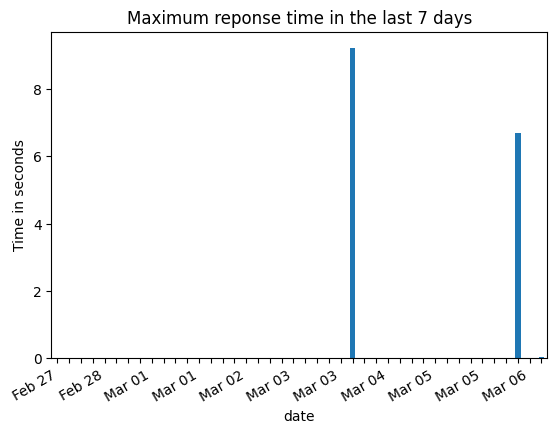

In [47]:
#store reponse times in Y axis
data_y = data['report']['report-data'][0][0]['data']

#convert dates to readable dates and store in X axis
data_x = [pd.to_datetime(datetime.fromtimestamp(d//1000)) \
          for d in data['report']['time-slices']]

df = pd.DataFrame(list(zip(data_x, data_y)), columns=["date", "count"])
q = df['count'].isnull() # change NaN values to 0
df.loc[q, 'count'] = 0
df.index = df['date']
df['count'] = df['count'] 

ax = df['count'].plot(kind='bar', x=df['date'])
ticklabels = ['']*len(df.index)
ticklabels[::4] = [item.strftime('%b %d') for item in df.index[::4]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
ax.set_title('Maximum reponse time in the last 7 days')
ax.set_ylabel('Time in seconds')
plt.gcf().autofmt_xdate()
plt.show()

#### Creating Quick Reports

- On the fly reporting
- Data is not saved

**Metrics Available**

- RequestCount - the number of requests received
- RequestsFailed - the number of requests that failed
- RequestsTimedOut - the number of requests that timed out
- RequestMaxResponseTime - the maximum response time
- RequestAvgResponseTime - the average response time
- ServiceActiveInstances - the maximum number of active (running) service instances sampled at 1 minute intervals, for a specified service


In [49]:
data = usage.quick_report(since="LAST_MONTH", metrics="RequestCount")
data.keys()

dict_keys(['report'])

In [50]:
type(data['report']['report-data']), len(data['report']['time-slices'])

(list, 30)

In [ ]:
import pandas as pd
data_flat = {
    'time_slices' : data['report']['time-slices']
}
for d in data['report']['report-data'][0]:
    data_flat[d['metric-type']] = d['data']

In [ ]:
pd.DataFrame(data_flat)

NameError: name 'pd' is not defined

## Questions?